In [1]:
"""
Created on Sun Jun 25 22:02:07 2017
@author: Data 602 final project - Yun, Jenny, Jim

@ Title: Machine learning in finance

Team member: Zhenni Xie,

             Yun Mai,

             Tze Fung Lung


Research Interest 
We are interested in financial analysis in machine learning. In this project, we will pick the dataset into different method of machine learning as our study target. So this project will help us deep understanding about machine learning using in finance sector.


Data Collection
We will collect data in two different ways:

1) Download history stock price from Yahoo Finance, 

2) Extract data information by python
   We are aim to extract the desired data information from web source into machine learning analysis.

Data Analysis Methods

1. Data Visualization
   We will visualize the data by using Matplotlib library to conduct analysis at certain stock price change over time and make comparsion.

2. Statistical Analysis
   We will use SciPy library to compare recent data with the past to check if there is a significant change in financial data.

3. Predictive analysis
   We want to predict the future price for specific stock based on the history stock price data and we will make a prediction thought simulation mode, logistic regression training and test and so on.

Project Goals

    We will gain more experience with data analysis in Python and get familiar to various python modules, such as Numpy, Pandas, SciPy and Matplotlib. 

    And We can have more idea in using machine learning method.
"""

'\nCreated on Sun Jun 25 22:02:07 2017\n@author: Data 602 final project - Yun, Jenny, Jim\n\n@ Title: Machine learning in finance\n\nTeam member: Zhenni Xie,\n\n             Yun Mai,\n\n             Tze Fung Lung\n\n\nResearch Interest \nWe are interested in financial analysis in machine learning. In this project, we will pick the dataset into different method of machine learning as our study target. So this project will help us deep understanding about machine learning using in finance sector.\n\n\nData Collection\nWe will collect data in two different ways:\n\n1) Download history stock price from Yahoo Finance, \n\n2) Extract data information by python\n   We are aim to extract the desired data information from web source into machine learning analysis.\n\nData Analysis Methods\n\n1. Data Visualization\n   We will visualize the data by using Matplotlib library to conduct analysis at certain stock price change over time and make comparsion.\n\n2. Statistical Analysis\n   We will use S

In [2]:
"""
Part - Linear Regression

Specific the Stock Parameter "GOOGL", "AMZN", and "XOM".

Specific the Index Parameter "SPY", "NDX", and "MNX".

Analysis from 2015-1-1 to Now, and assume 30 days predication

Scrapying the real time financial data by using "pandas_datareader.data" function. 

To quantify the linear relationship between an explanatory variable (x) and response variable (y).

We can then predict the average response for all subjects with a given value of the explanatory variable


"""

'\nPart - Linear Regression\n\nSpecific the Stock Parameter "GOOGL", "AMZN", and "XOM".\n\nSpecific the Index Parameter "SPY", "NDX", and "MNX".\n\nAnalysis from 2015-1-1 to Now, and assume 30 days predication\n\nScrapying the real time financial data by using "pandas_datareader.data" function. \n\nTo quantify the linear relationship between an explanatory variable (x) and response variable (y).\n\nWe can then predict the average response for all subjects with a given value of the explanatory variable\n\n\n'

In [3]:
import math
import numpy as np
import pandas as pd
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import datetime
import pandas_datareader.data as web

C:\Users\voyo\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
symbols = [
    'GOOGL',   # GOOGLE
    'AMZN',    # AMAZON
    'XOM'      # Exxon Mobil for comparsion with Crude oil
          ]  
print ("Ticker Symbols Specified: {0}".format(symbols))

Ticker Symbols Specified: ['GOOGL', 'AMZN', 'XOM']


In [5]:
index = [
    'SPY',    # S&P 500
    'NDX',    # nasdaq
    'MNX'     # SQUARE
          ]  
print ("Index Symbols Specified: {0}".format(index))

Index Symbols Specified: ['SPY', 'NDX', 'MNX']


In [6]:
now = datetime.datetime.now()
now = str(now.strftime("%Y, %m, %d"))

sttDate = '2015, 1, 1'; 
print ("Time Period Specified: {0} -> {1}".format(sttDate, now))

Time Period Specified: 2015, 1, 1 -> 2017, 12, 08


In [7]:
# Real time data scraping from yahoo
def dataset(z):
        i = z
        df = web.DataReader(i, data_source = 'yahoo', start = sttDate, end = now)
        df.iloc
    
    # choose number of columns
        df = df[['Open',  'High',  'Low',  'Close', 'Volume']] 
        df['HL_PCT'] = (df['High'] - df['Low']) / df['Low'] * 100.0
        df['PCT_change']=(df['Close'] - df['Open']) / df['Open'] * 100.0
        df = df[['Close', 'HL_PCT', 'PCT_change', 'Volume']]
        forecast_col = 'Close'
        df.fillna(value=-99999, inplace=True)
    
    # Predict 30 furture days
        n=30 
        df['label'] = df[forecast_col].shift(-n)
        df=df[:-n]
        #print ("This dataset is for: {0} -> {1}".format(i, df.head()))
        return(df)

In [8]:
# Visualization
def visual (z):
    for i in z:
        df = dataset(i)
        print ("This dataset is for: {0} -> {1}".format(i, df.head()))
        
        df['Close'].plot(figsize=(15,6), color="green")
        plt.legend(loc=4)
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.show()

        df['HL_PCT'].plot(figsize=(15,6), color="red")
        plt.xlabel('Date')
        plt.ylabel('High Low Percentage')
        plt.show()

        df['PCT_change'].plot(figsize=(15,6), color="blue")
        plt.xlabel('Date')
        plt.ylabel('Percent Change')
        plt.show()

In [9]:
# Machine Learning Analysis
def analysis (z):
    for i in z:
        df = dataset(i)
        
        # train and test 90% of data
        N_tt = int(math.ceil(0.1 * len(df)))

        # define X feature by np.array
        X = np.array(df.drop(['label'], 1))
        X = preprocessing.scale(X)
        # 10% difference
        X_lately=X[-N_tt:] 
        # define 90% of data
        X=X[:-N_tt]
        #print(X)
        print ("X is for: {0} -> {1}".format(i, X))
        # define y feature by np.array
        y = np.array(df['label'])
        # 10% difference
        y_known = y[-N_tt:]
        # define 90% of data
        y = y[:-N_tt]      
        #print(y)
        print ("y is for: {0} -> {1}".format(i, y))
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        
        #train and test 90% of data
        for k in ['linear','poly','rbf','sigmoid']:
            clf = svm.SVR(kernel=k)
            clf.fit(X_train, y_train)
            confidence = clf.score(X_test, y_test)
            #print(k,confidence)
            print ("The {1} of {0} is: {2}".format(i, k, confidence))

        #train and test 90% of data
        clf = LinearRegression()
        clf.fit(X_train, y_train)
        accuracy = clf.score(X_test, y_test)
        #print (accuracy)
        print ("The accuracy of Linear Regression for {0} is {1}".format(i, accuracy))


        # Predict use linear regression
        forecast_set = clf.predict(X_lately)
        diff = forecast_set - y_known 
        diff = diff[:-1] 

        # known averaged difference
        avg_diff=np.average(diff)
        #print (avg_diff)
        print ("The average difference for {0} is {1}".format(i, avg_diff))

        # Standard deviation
        sigma = math.sqrt(np.average((diff-avg_diff)**2))
        #print (sigma)
        print ("The sigma of SD for {0} is {1}".format(i, sigma))
        skewness = np.average(((diff-avg_diff)/sigma)**3)
        #print (skewness)
        print ("The skewness of SD for {0} is {1}".format(i, skewness))
        kurt=np.average(((diff-avg_diff)/sigma)**4)
        #print (kurt)
        print ("The kurt of SD for {0} is {1}".format(i, kurt))
        
        x=range(len(diff))
        plt.figure(1)
        forecastplot=plt.scatter(x,forecast_set[:-1],c='r')
        knownplot=plt.scatter(x,y_known[:-1], c='b')
        plt.legend([forecastplot,knownplot],['forecasted value', 'known value'])
        plt.xlabel('days')
        plt.ylabel('Adj.Close')

        plt.figure(2)  
        plt.scatter(x,diff)
        plt.xlabel('days')
        plt.ylabel('(forcated-known) of Adj.Close')

        plt.figure(3)  
        plt.hist(diff, bins=20)
        plt.title('Histogram of (forcated-known) values of Adj.Close')
        plt.show()

In [10]:
def group (z):
    df1 = pd.DataFrame()
    df = dataset(z[0])
    df1 = df["Close"]
    for i in z[1:]:
        df = dataset(i)
        df4 = df["Close"]
        df1 = pd.concat([df1, df4], axis=1)
    df1.columns = [z[0:]]
    print (df1.head())
    
    df1.plot(grid = True)
    return (df1)

In [11]:
def stock_return (z):
    df1 = group (z)
    stock_return = df1.apply(lambda x: x / x[0])
    stock_return.head()
    stock_return.plot(grid = True).axhline(y = 1, color = "black", lw = 2)

Ticker analysis: 
This dataset is for: GOOGL ->                  Close    HL_PCT  PCT_change   Volume       label
Date                                                             
2015-01-02  529.549988  1.500338   -0.572660  1324000  545.010010
2015-01-05  519.460022  1.977787   -1.458788  2059100  542.650024
2015-01-06  506.640015  3.097623   -2.662821  2722800  546.450012
2015-01-07  505.149994  1.556636   -1.135144  2345900  541.799988
2015-01-08  506.910004  2.521113    1.076747  3652700  535.000000


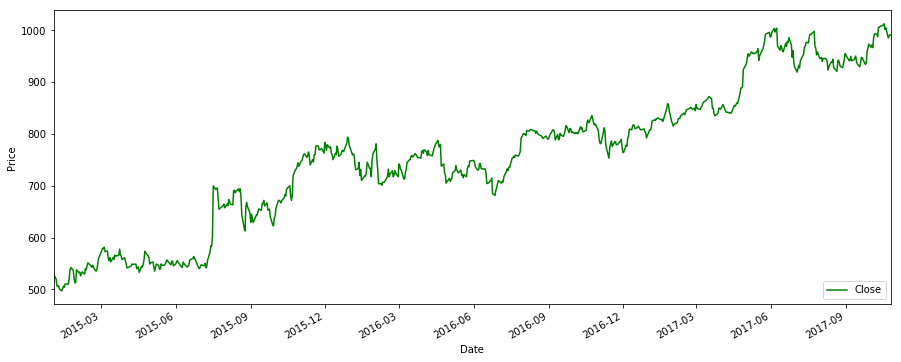

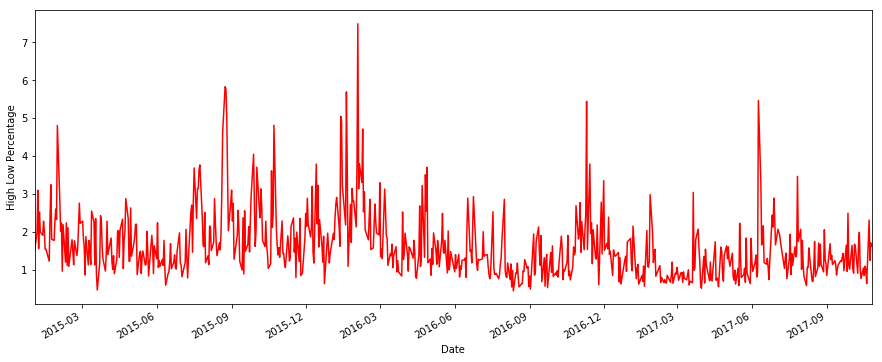

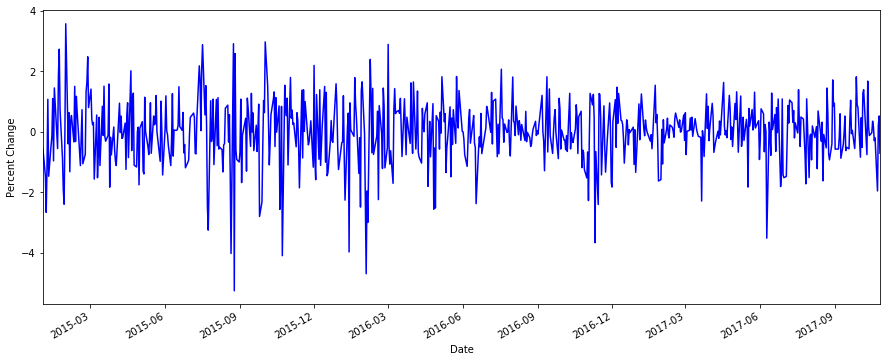

This dataset is for: AMZN ->                  Close    HL_PCT  PCT_change   Volume       label
Date                                                             
2015-01-02  308.519989  2.537793   -1.298867  2783200  375.429993
2015-01-05  302.190002  2.502908   -1.569984  2774200  373.369995
2015-01-06  295.290009  3.632258   -2.299491  3519000  379.000000
2015-01-07  298.420013  2.014700    0.309248  2640300  383.660004
2015-01-08  300.459991  2.374128    0.046612  3088400  380.140015


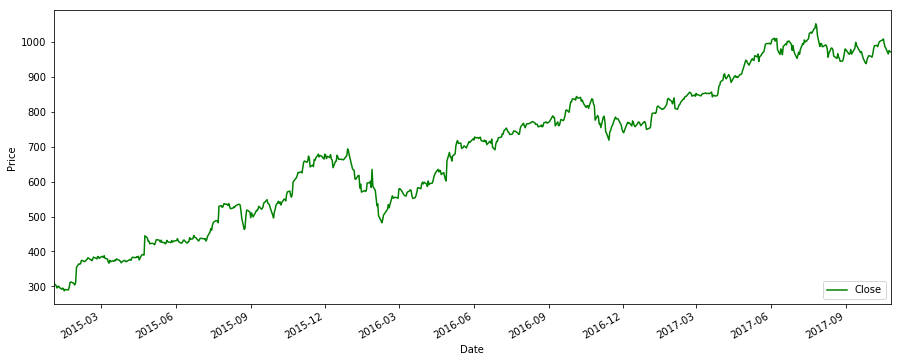

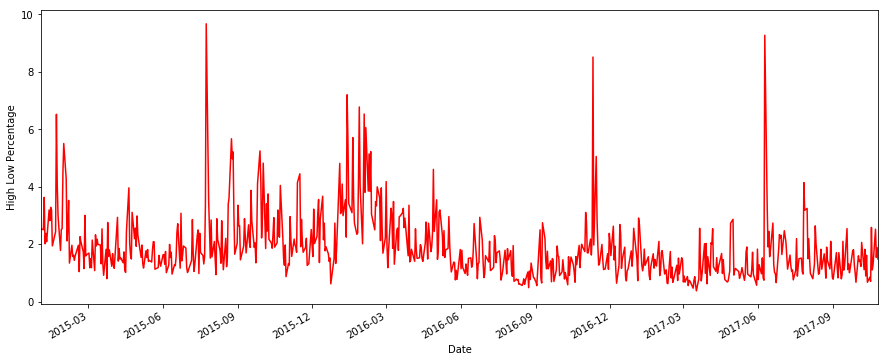

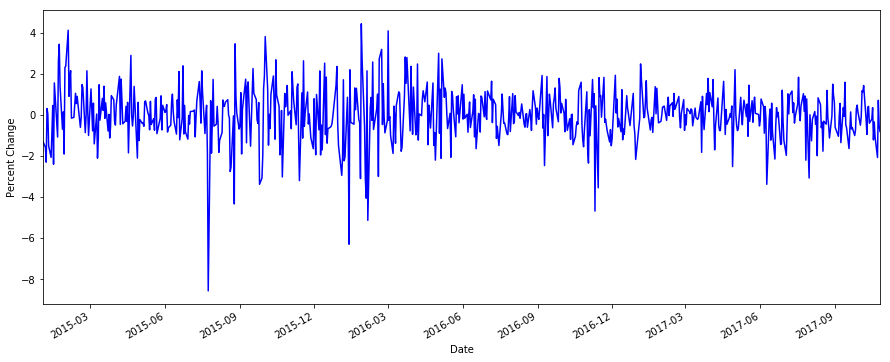

This dataset is for: XOM ->                 Close    HL_PCT  PCT_change    Volume      label
Date                                                            
2015-01-02  92.830002  1.350621    0.628728  10220400  93.050003
2015-01-05  90.290001  3.240226   -1.965252  18502400  91.010002
2015-01-06  89.809998  2.684798   -0.476507  16670700  89.440002
2015-01-07  90.720001  1.644448    0.077219  13590700  89.919998
2015-01-08  92.230003  1.395601    1.073976  15487500  89.010002


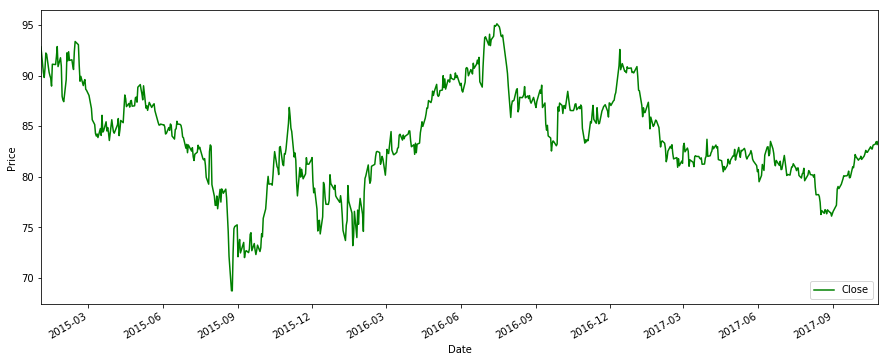

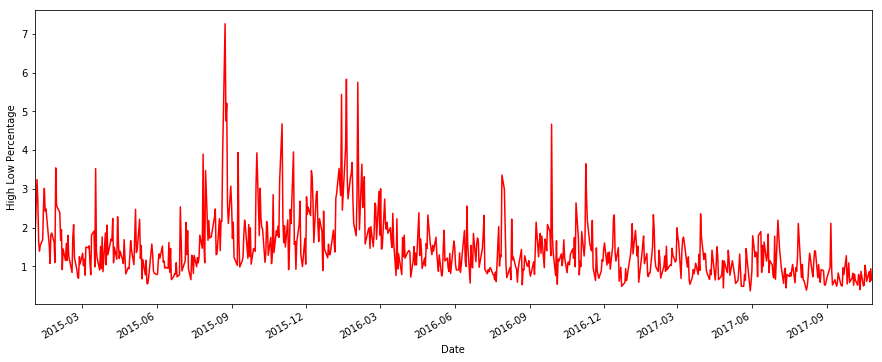

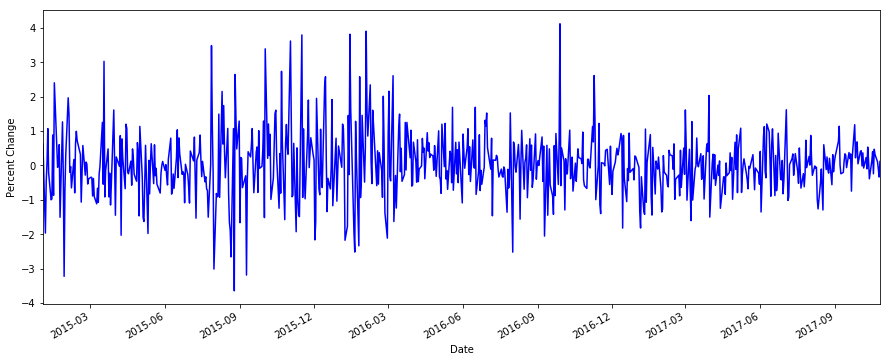

In [12]:
print("Ticker analysis: ")
#dataset (symbols)
visual (symbols)

X is for: GOOGL -> [[-1.68029135 -0.14574099 -0.53808768 -0.61146205]
 [-1.75480446  0.40025859 -1.3802226   0.11722004]
 [-1.84947857  1.68087826 -2.52447992  0.77512549]
 ..., 
 [ 1.56388305 -0.21392351 -0.1847522  -0.41261342]
 [ 1.6234051  -0.9903924   0.2900746  -0.85372827]
 [ 1.61638983 -0.383137   -0.02889907 -0.27789992]]
y is for: GOOGL -> [  545.01001    542.650024   546.450012   541.799988   535.         538.650024
   547.330017   559.289978   562.630005   575.02002    578.789978
   578.330017   581.429993   572.900024   574.099976   559.849976
   555.690002   561.169983   553.         561.640015   557.609985
   566.159973   563.669983   564.950012   565.369995   577.539978   567.
   563.640015   557.549988   561.140015   554.700012   549.48999
   541.309998   543.950012   544.859985   548.840027   548.02002
   548.539978   548.640015   539.780029   541.039978   543.52002
   532.73999    544.530029   542.919983   549.179993   557.460022
   573.659973   566.119995   564.3699

The rbf of GOOGL is: 0.3902304375841521
The sigmoid of GOOGL is: 0.5979142563687492
The accuracy of Linear Regression for GOOGL is 0.8682524517853999
The average difference for GOOGL is -37.744417608271036
The sigma of SD for GOOGL is 40.92582210135422
The skewness of SD for GOOGL is 0.33350062889373877
The kurt of SD for GOOGL is 2.3547983141846913


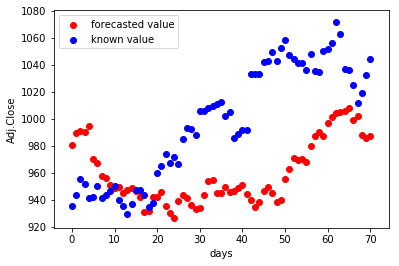

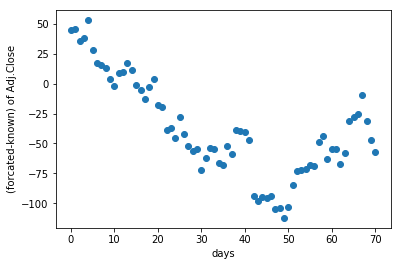

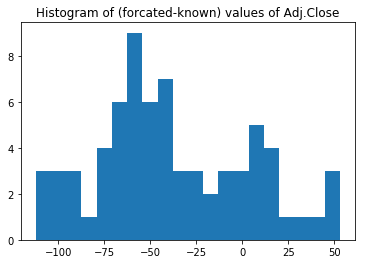

X is for: AMZN -> [[-1.86481185  0.57616842 -1.00685307 -0.49180393]
 [-1.89592019  0.54517838 -1.21764685 -0.49607781]
 [-1.92982978  1.54843736 -1.78483914 -0.14239043]
 ..., 
 [ 1.53652046 -0.69885935 -0.3057783  -0.44545607]
 [ 1.54231947 -1.00459447 -0.04274757 -0.81505178]
 [ 1.5827652  -0.71011522  0.41703655 -0.0504545 ]]
y is for: AMZN -> [  375.429993   373.369995   379.         383.660004   380.140015
   378.589996   385.369995   384.799988   380.160004   385.660004
   384.609985   382.720001   387.829987   380.089996   378.559998
   369.51001    366.369995   374.23999    370.579987   373.350006
   371.920013   375.140015   373.23999    378.48999    375.109985
   374.089996   370.959991   367.350006   370.559998   374.589996
   372.100006   370.26001    372.25       377.040009   374.410004
   381.200012   383.540009   382.649994   382.359985   385.109985
   383.450012   386.040009   375.559998   389.51001    391.179993
   389.799988   389.98999    445.100006   438.559998   4

The poly of AMZN is: 0.2465042222300542
The rbf of AMZN is: 0.4096579557315919
The sigmoid of AMZN is: 0.5771445093016525
The accuracy of Linear Regression for AMZN is 0.8764485030461391
The average difference for AMZN is -40.59774900112117
The sigma of SD for AMZN is 88.43792044910941
The skewness of SD for AMZN is -0.18883389315190338
The kurt of SD for AMZN is 1.437966932616421


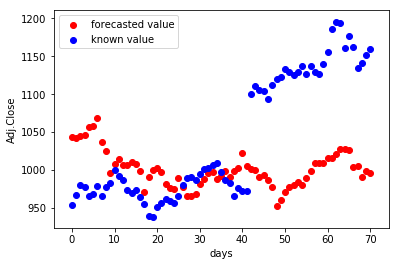

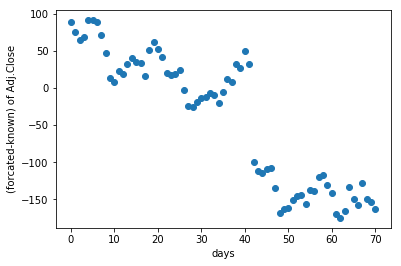

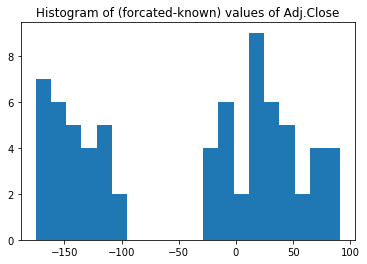

X is for: XOM -> [[ 1.88250589 -0.14306436  0.63162198 -0.48169917]
 [ 1.35922739  2.18103909 -2.06147133  1.18266258]
 [ 1.26033954  1.49789536 -0.51584332  0.81456171]
 ..., 
 [-0.5608331  -1.25579085 -0.02112944 -1.41377792]
 [-0.49696884 -0.82966542  0.33775627 -1.02895706]
 [-0.58349476 -0.8912682  -0.20057166 -0.94505571]]
y is for: XOM -> [ 93.050003  91.010002  89.440002  89.919998  89.010002  89.419998
  89.599998  88.650002  88.540001  88.040001  87.620003  87.18      86.739998
  85.629997  85.160004  84.260002  84.019997  84.220001  83.870003
  84.760002  84.080002  86.07      84.410004  84.540001  85.43      84.519997
  84.860001  84.32      83.580002  85.629997  85.        84.459999
  84.300003  85.129997  85.75      84.059998  84.650002  85.559998
  85.339996  86.629997  88.080002  87.730003  86.93      87.239998
  86.879997  87.459999  87.540001  86.970001  87.010002  87.800003
  87.870003  87.370003  88.849998  89.110001  88.610001  88.190002
  87.599998  88.989998  86.

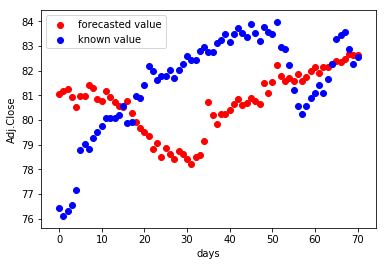

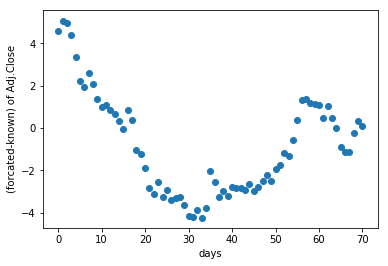

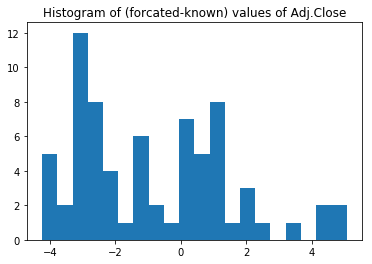

In [14]:
analysis (symbols)

In [19]:
stock_return(symbols) 

                 GOOGL        AMZN        XOM
Date                                         
2015-01-02  529.549988  308.519989  92.830002
2015-01-05  519.460022  302.190002  90.290001
2015-01-06  506.640015  295.290009  89.809998
2015-01-07  505.149994  298.420013  90.720001
2015-01-08  506.910004  300.459991  92.230003


Index analysis: 
X is for: SPY -> [[-0.70220906  0.71843039 -0.77009088  0.41288765]
 [-0.91870418  1.004269   -1.9594561   1.37370579]
 [-1.02957759  1.71474185 -1.83608676  2.16201762]
 ..., 
 [ 1.57303736 -0.8891355   0.23368441 -1.22271559]
 [ 1.63956161 -0.31686291  0.72008967 -0.80797956]
 [ 1.63781103 -1.03032304  0.00940697 -1.34119934]]
y is for: SPY -> [ 210.110001  210.130005  209.979996  211.240005  211.210007  211.809998
  211.630005  211.380005  210.660004  211.990005  211.119995  210.229996
  210.460007  207.5       208.360001  204.979996  204.5       207.100006
  205.830002  208.580002  207.960007  210.460007  209.5       210.410004
  210.        208.820007  205.759995  205.270004  205.740005  208.25
  206.429993  205.699997  206.440002  207.830002  207.279999  207.979996
  208.899994  210.039993  209.089996  209.490005  210.429993  210.369995
  207.949997  209.850006  209.600006  210.630005  211.160004  211.649994
  210.770004  211.440002  210.570007  208.460007  210.7

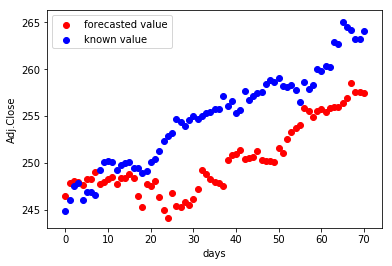

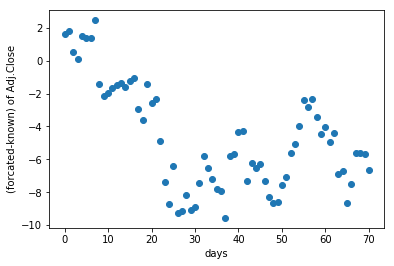

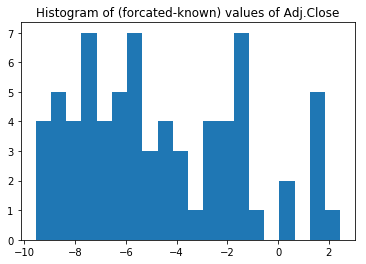

X is for: NDX -> [[ 0.24256884 -0.03748732 -0.03748633 -0.54543817]
 [ 0.11288976 -0.03748732 -0.03748633 -0.52499715]
 [-0.01678931 -0.03748732 -0.03748633 -0.52499715]
 ..., 
 [ 0.67166327 -0.03748645 -0.03748546 -0.52555742]
 [ 0.58784389 -0.03748584 -0.03748662  2.44932526]
 [-0.36775144 -0.03748732 -0.03748633 -0.54543817]]
y is for: NDX -> [  4385.339844   4390.910156   6984.149902   4443.049805   4449.490234
   6984.149902   4440.589844   7072.560059   4440.669922   4483.049805
   7160.970215   7160.970215   7160.970215   7160.970215   7160.970215
   7249.370117   7337.779785   7426.189941   7514.589844   7514.589844
   7514.589844   7514.589844   7603.         7603.         4445.540039
   7603.         7603.         7603.         4332.859863   7603.         7603.
   7603.         7603.         7603.         7603.         7603.         7603.
   7603.         4409.209961   4397.649902   7603.         7603.         7603.
   7603.         7603.         7603.         7603.         7

The rbf of NDX is: -0.022557292227934896
The sigmoid of NDX is: -0.025962898497084552
The accuracy of Linear Regression for NDX is 0.047738647623060126
The average difference for NDX is 95.56712331709157
The sigma of SD for NDX is 2532.9313798534536
The skewness of SD for NDX is -1.1499099929957546
The kurt of SD for NDX is 2.6494878424094526


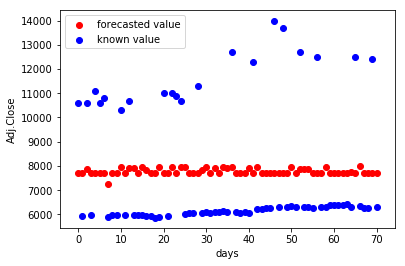

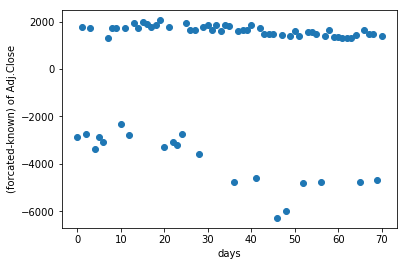

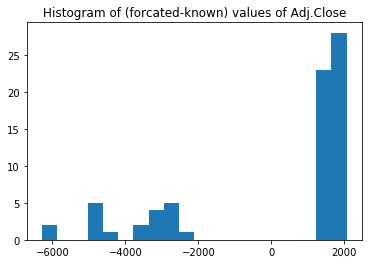

C:\Users\voyo\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:160: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


X is for: MNX -> [[-1.05306533  0.57217816 -0.20372778 -1.22259595]
 [-1.17435355  0.83579024 -1.75062441 -0.23628013]
 [-1.26234017  1.08106569 -1.30537213  0.78717488]
 ..., 
 [ 1.68677806 -0.84150819  0.20393262 -0.21064229]
 [ 1.76512476 -0.36906555  0.74559308 -0.74780176]
 [ 1.76792927 -0.8241036  -0.02601467 -0.88529636]]
y is for: MNX -> [ 4385.299805  4390.899902  4411.899902  4443.100098  4449.5       4451.
  4440.600098  4462.299805  4440.700195  4483.        4458.799805
  4445.399902  4452.100098  4399.200195  4413.        4329.100098
  4305.399902  4336.200195  4314.899902  4370.5       4375.600098  4422.5
  4426.799805  4458.5       4445.5       4431.        4329.299805
  4315.299805  4332.899902  4382.799805  4333.700195  4311.299805  4316.
  4351.        4344.100098  4376.        4404.        4422.        4409.200195
  4397.600098  4424.5       4418.799805  4351.799805  4417.399902  4436.
  4460.799805  4477.100098  4536.799805  4525.        4515.299805
  4488.200195  4

The poly of MNX is: 0.04959437804780242
The rbf of MNX is: 0.016219878090674045
The sigmoid of MNX is: 0.09225537373934745
The accuracy of Linear Regression for MNX is 0.8551686054464998
The average difference for MNX is -80.2087249361228
The sigma of SD for MNX is 121.70285250367087
The skewness of SD for MNX is -0.11380419169426052
The kurt of SD for MNX is 2.079139129398065


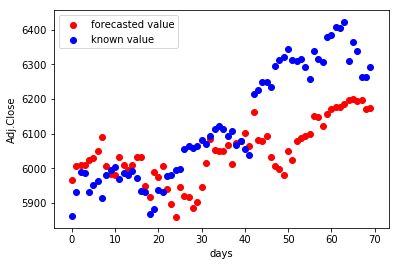

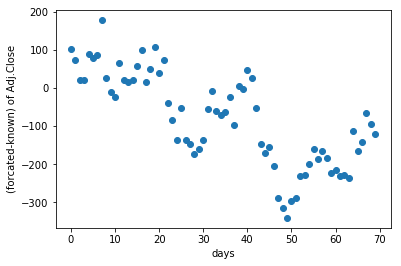

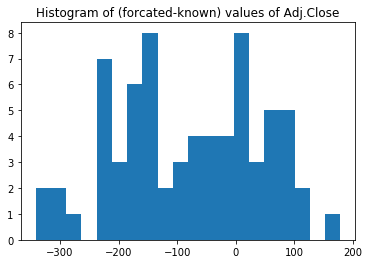

In [32]:

print("Index analysis: ")
#dataset (index)
#visual (index)
analysis (index)

In [ ]:
"""
Conclusion:
By using linear regression method, we compare and find out the relationship between specific stock and index. 
And it use the machine learning to make each of forcasting value, include stock - Google, Amazon, Exxon Mobil and index - Nasadq, SP500 and MNX. 
The function can add any index and stock symbols into comparion. 
Though this project, we use the function of "pandas_datareader.data" to scrape the real time data for ananlysis. 
But we found some constraints in this function "pandas_datareader.data", it is not pretty stable to collect data and need to re-run / re-connect several times if large amount data scrapying.
When using function of "quandl", it have a limited connection times per day, so we use this two into our different method for comparsion.

For the machine learning, we get the pre-loaded data at 12-08-2017 in Jypyter Notebook, the known trend of google is upward, but the forcast trend is downward and accuracy of Linear Regression for GOOGL is 0.86. 
And the known trend of amzn is upward, but the forcast trend is downward and accuracy of Linear Regression for amzn is 0.87. 
But for the XOM, the trend for upward and downward does not show definitely. 

For the SP500, the forcast trend is upward and the acuracy of Linear Regression is 0.75, 
And Nasdaw, no definite trend is shown, but the acuracy of Linear Regression is less than 10%, so the result of ananlysis are meaning less for thsi time.
It has a upward trend in the forcast value for MNX, and the accuracy of Linear Regression is 0.85.
From the result of analysis, the upward trend for index will be predicted for next transaction day.

"""